## Plan

1. read words and their corresponding language labels from data file.
2. preprocess and clean words.

See `Part2_readme.md` for information about this data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# set the font size of plots
plt.rcParams['font.size'] = 14

np.set_printoptions(precision=3)

In [5]:
from nltk import FreqDist
import re

In [6]:
# Add higher directory to python modules path.

import sys
sys.path.append("..")

In [7]:
from utilities import arabic_nlp_utils
#import importlib
#importlib.reload(arabic_nlp_utils)

In [8]:
from utilities import generic_nlp_utils

This is just a aaaaaaahhhhhhh simple. js .... jshd)jhsd__js--dh 

 asjh
 test !!
This just a aahh simple js jshd jhsd js dh asjh test


## Load data from file

In [9]:
social_media_words_df = pd.read_csv('../../raw_data/social_media_words.csv', header=None)
social_media_words_df.columns = ['word','doc_freq','lang_label']
print(social_media_words_df.shape)
social_media_words_df.head()

(3341, 3)


,word,doc_freq,lang_label
0,و,6338,NaN
1,في,3985,NaN
2,من,2621,NaN
3,يا,2213,NaN
4,الله,1696,NaN


In [213]:
# Verify that the raw words are all distinct
# are there duplicate words?
assert(social_media_words_df.word.nunique()==social_media_words_df.shape[0])

In [214]:
social_media_words_df.loc[social_media_words_df.lang_label.isnull(),'lang_label'] = 'MSA'
social_media_words_df.head()

,word,doc_freq,lang_label
0,و,6338,MSA
1,في,3985,MSA
2,من,2621,MSA
3,يا,2213,MSA
4,الله,1696,MSA


In [215]:
social_media_words_df.lang_label.value_counts()

MSA       2123
TN         799
NE         172
MSA,TN     100
NOISE       90
NE,MSA      37
BORROW       8
NE,TN        6
ALG          6
Name: lang_label, dtype: int64

In [216]:
social_media_words_df.dtypes

word          object
doc_freq       int64
lang_label    object
dtype: object

In [217]:
social_media_words_df = social_media_words_df.loc[(social_media_words_df.lang_label.str.contains('MSA')) | social_media_words_df.lang_label.str.contains('TN') ]
social_media_words_df.shape

(3065, 3)

In [218]:
social_media_words_df.lang_label.value_counts()

MSA       2123
TN         799
MSA,TN     100
NE,MSA      37
NE,TN        6
Name: lang_label, dtype: int64

****

## Explore Corpus Character Set

In [219]:
corpus_as_char_list = "".join(social_media_words_df.word.tolist())
print(type(corpus_as_char_list),len(corpus_as_char_list))

<class 'str'> 13805


In [220]:
fdist1 = FreqDist([c for c in corpus_as_char_list])

In [221]:
print("number of characters:" + str(fdist1.N()))
print("number of unique characters:" + str(fdist1.B()))

number of characters:13805
number of unique characters:80


In [222]:
print('List of distinct characters:')
print(sorted(list(fdist1.keys())))

List of distinct characters:
['ء', 'آ', 'أ', 'ؤ', 'إ', 'ئ', 'ا', 'ب', 'ة', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى', 'ي', 'ی', 'ﷲ', 'ﺍ', 'ﺎ', 'ﺑ', 'ﺒ', 'ﺓ', 'ﺔ', 'ﺖ', 'ﺠ', 'ﺡ', 'ﺣ', 'ﺤ', 'ﺬ', 'ﺭ', 'ﺮ', 'ﺶ', 'ﺻ', 'ﻋ', 'ﻒ', 'ﻓ', 'ﻙ', 'ﻚ', 'ﻛ', 'ﻝ', 'ﻞ', 'ﻟ', 'ﻠ', 'ﻣ', 'ﻤ', 'ﻥ', 'ﻦ', 'ﻧ', 'ﻨ', 'ﻪ', 'ﻫ', 'ﻬ', 'ﻭ', 'ﻰ', 'ﻲ', 'ﻳ', 'ﻴ', 'ﻻ', 'ﻼ']


In [223]:
print('The most common characters:')
fdist1.most_common(5)

The most common characters:


[('ا', 2055), ('ل', 1360), ('ي', 1097), ('م', 938), ('و', 727)]

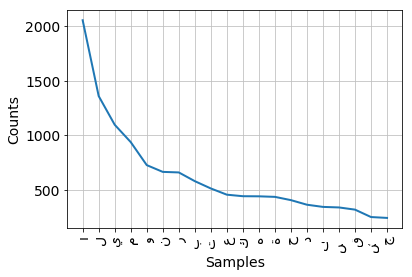

In [224]:
fdist1.plot(20, cumulative=False)

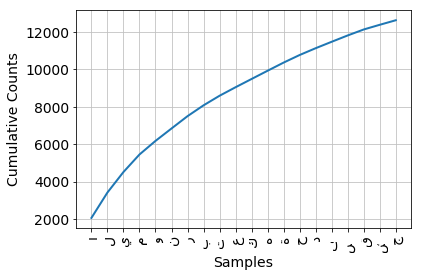

In [225]:
fdist1.plot(20,cumulative=True)

In [226]:
corpus_chars_df = pd.DataFrame(fdist1.items())
corpus_chars_df.columns = ['character','frequency']

# Unicode number of each distinct character:
corpus_chars_df['unicode_dec']= corpus_chars_df.character.map(ord)
corpus_chars_df['unicode_hex']= corpus_chars_df.character.map(lambda x: hex(ord(x)))

corpus_chars_df = corpus_chars_df.set_index('character')

corpus_chars_df.head()

,frequency,unicode_dec,unicode_hex
character,,,
و,727,1608,0x648
ف,344,1601,0x641
ي,1097,1610,0x64a
م,938,1605,0x645
ن,665,1606,0x646


In [227]:
idx = corpus_chars_df.unicode_hex.str.startswith('0x6')
print(corpus_chars_df.shape[0],idx.sum())

80 37


In [228]:
# Characters from the Standard Arabic Character set

corpus_chars_df[idx].sort_values(by='unicode_dec', ascending=True)

,frequency,unicode_dec,unicode_hex
character,,,
ء,37,1569,0x621
آ,6,1570,0x622
أ,110,1571,0x623
ؤ,5,1572,0x624
إ,25,1573,0x625
ئ,16,1574,0x626
ا,2055,1575,0x627
ب,580,1576,0x628
ة,436,1577,0x629


In [229]:
# Characters from the Extended Arabic Character set

corpus_chars_df[~idx].sort_values(by='unicode_dec', ascending=True)

,frequency,unicode_dec,unicode_hex
character,,,
ﷲ,2,65010,0xfdf2
ﺍ,5,65165,0xfe8d
ﺎ,6,65166,0xfe8e
ﺑ,1,65169,0xfe91
ﺒ,2,65170,0xfe92
ﺓ,1,65171,0xfe93
ﺔ,1,65172,0xfe94
ﺖ,2,65174,0xfe96
ﺠ,1,65184,0xfea0


In [230]:
# Rare characters

u = corpus_chars_df[corpus_chars_df.frequency<5]
print(u.shape[0])
#print(sorted(u.index.tolist()))
print(','.join(sorted(u.index.tolist())))

40
ی,ﷲ,ﺑ,ﺒ,ﺓ,ﺔ,ﺖ,ﺠ,ﺡ,ﺣ,ﺤ,ﺬ,ﺭ,ﺮ,ﺶ,ﺻ,ﻋ,ﻒ,ﻓ,ﻙ,ﻚ,ﻝ,ﻞ,ﻟ,ﻠ,ﻣ,ﻤ,ﻥ,ﻦ,ﻧ,ﻨ,ﻪ,ﻫ,ﻬ,ﻭ,ﻰ,ﻳ,ﻴ,ﻻ,ﻼ


In [231]:
#for x in sorted(u.index.tolist()):
#    print(x)

In [232]:
# Rare characters sorted by unicode value

u.sort_values(by='unicode_dec', ascending=True).head()

,frequency,unicode_dec,unicode_hex
character,,,
ی,1,1740,0x6cc
ﷲ,2,65010,0xfdf2
ﺑ,1,65169,0xfe91
ﺒ,2,65170,0xfe92
ﺓ,1,65171,0xfe93


In [233]:
u.sort_values(by='unicode_dec', ascending=False).head()

,frequency,unicode_dec,unicode_hex
character,,,
ﻼ,1,65276,0xfefc
ﻻ,1,65275,0xfefb
ﻴ,4,65268,0xfef4
ﻳ,1,65267,0xfef3
ﻰ,2,65264,0xfef0


#### Select unwanted characters
For this corpus, unwanted characters are characters not in the **standard** Arabic character set.

In [234]:
idx1 = corpus_chars_df.unicode_hex.str.startswith('0x6')
idx2 = (corpus_chars_df.frequency>=5)
idx1.sum(), idx2.sum(), (idx1&idx2).sum()

(37, 40, 36)

In [235]:
unwanted_characters = sorted(corpus_chars_df.loc[~(idx1&idx2)].index.tolist())
print(len(unwanted_characters))

44


*Observations & conclusions*

- 88 distinct characters in this corpus, with 38 Arabic letters from the standard Arabic character set, and 50 Arabic letters from the extended Arabic character set.
- The top 20 characters cover more than 92% of all character occurrences in the corpus.
- 45 rare characters -- that occur less than 5 times:
        ڨ,ی,ﷲ,ﺋ,ﺑ,ﺒ,ﺓ,ﺔ,ﺖ,ﺗ,ﺠ,ﺡ,ﺣ,ﺤ,ﺬ,ﺭ,ﺮ,ﺰ,ﺲ,ﺶ,ﺷ,ﺸ,ﺻ,ﻒ,ﻓ,ﻙ,ﻚ,ﻝ,ﻞ,ﻟ,ﻠ,ﻤ,ﻥ,ﻦ,ﻧ,ﻨ,ﻪ,ﻫ,ﻬ,ﻭ,ﻮ,ﻰ,ﻳ,ﻻ,ﻼ
        
      Except for the first 2 characters, the above characters are all from the **extended** Arabic character set.
      
*Remark*:
- The Unicode characters of the **standard** Arabic character set are in the range **\u0600 - \u06FF**.
- In the corpus cleanup below, we will just remove words that contain characters from the **extended** Arabic character set, but a more rigorous approach is to normalize them by converting them to the standard Arabic character set (future work).

****

## Corpus Cleanup
- remove words that contain non-Arabic letters
- Arabic letter normalization (remove tatweel and diacritics + conflate hamzas and alifs)
- remove duplicated words (conflated words due to normalization)
- remove elongated words (informal/social media non-standard spelling)
- remove one-letter words
- remove very long words

### Remove Words that Contain Unwanted Characters

In [236]:
social_media_words_df.head()

,word,doc_freq,lang_label
0,و,6338,MSA
1,في,3985,MSA
2,من,2621,MSA
3,يا,2213,MSA
4,الله,1696,MSA


In [237]:
unwanted_characters_regexp = '[' + ''.join(unwanted_characters) + ']'
unwanted_characters_regexp

'[یﷲﺍﺎﺑﺒﺓﺔﺖﺠﺡﺣﺤﺬﺭﺮﺶﺻﻋﻒﻓﻙﻚﻛﻝﻞﻟﻠﻣﻤﻥﻦﻧﻨﻪﻫﻬﻭﻰﻲﻳﻴﻻﻼ]'

In [238]:
idx = social_media_words_df.word.map(lambda x: re.search(unwanted_characters_regexp,x)!=None)
idx.sum()

32

In [239]:
# Just for checking
#idx2 = social_media_words_df.word.map(lambda x: re.search(arabic_nlp_utils.NON_ARABIC_CHARS_REGEX,x)!=None)
#idx2.sum()

In [240]:
# Words that contain non-Arabic letters  (that will be removed)

print(social_media_words_df.loc[idx].word.tolist())

['ﻓﻲ', 'ﻻ', 'ﻳﺎ', 'ﻣﻦ', 'ﺭﺑﻲ', 'ﷲ', 'ﻣﺤﻼﻙ', 'ﻋﻠﻰ', 'ﻣﺎ', 'ﻋﻠﻴﻚ', 'ﻫﻬﻬﻪ', 'ﺍﻧﺖ', 'ﻛﺎﻥ', 'ﻟﻲ', 'ﺍﻟﻠﻲ', 'ﻛﻲ', 'ﻫﺬﺍ', 'ﺭﻭﻋﺔ', 'ﻧﺤﺒﻚ', 'ﺭﻭﺣﻚ', 'ﺍﻟﺠﻤﺎﻝ', 'ﻓﻴﻪ', 'ﻛﻴﻒ', 'ﻣﺶ', 'علی', 'ﻓﻴﻚ', 'ﻛﻞ', 'ﻛﻨﺖ', 'ﻋﺎﻫﺮﺓ', 'ﺻﺒﺎﺡ', 'ﺍﺣﻠﻰ', 'ﻭﷲ']


In [241]:
social_media_words_df[idx].head()

,word,doc_freq,lang_label
317,ﻓﻲ,63,MSA
360,ﻻ,55,MSA
482,ﻳﺎ,41,MSA
556,ﻣﻦ,36,MSA
772,ﺭﺑﻲ,26,MSA


In [242]:
social_media_words_df_clean = social_media_words_df[~idx].copy()
social_media_words_df.shape,social_media_words_df_clean.shape

((3065, 3), (3033, 3))

### Normalize Arabic letters

1. remove tatweel and diacritics
2. orthographic letters noramlization (letters written in different ways, such as alif and hamza)

See documentation of function `arabic_nlp_utils.normalize_arabic_text` for more details.

In [243]:
## remove tatweel and diacritics
social_media_words_df_clean['word_norm'] = social_media_words_df_clean.word.map(lambda w: arabic_nlp_utils.normalize_arabic_text_1(w))

# number of normalized words
(social_media_words_df_clean.word.map(len) != social_media_words_df_clean.word_norm.map(len)).sum()

0

*Remark*: there are no diactritics and no tatweel characters in this corpus!

In [244]:
## orthographic letter normalization (letters written in different ways, such as alif and hamza)

social_media_words_df_clean['word_norm'] = social_media_words_df_clean.word_norm.map(
    lambda w: arabic_nlp_utils.normalize_arabic_text_2(w, norm_alif=True, norm_hamza=False, norm_yah=False, norm_tah=False))

# number of normalized words
(social_media_words_df_clean.word != social_media_words_df_clean.word_norm).sum()

140

In [254]:
# number of words that were normalized

idx = social_media_words_df_clean.word != social_media_words_df_clean.word_norm
print(idx.sum())

# some of of the words that were normalized
social_media_words_df_clean[idx].head(10)

140


,word,doc_freq,lang_label,word_norm
91,أن,150,MSA,ان
103,إلي,140,"MSA,TN",الي
130,إلى,112,"MSA,TN",الى
143,أحسن,105,MSA,احسن
168,أنا,97,MSA,انا
190,أما,90,MSA,اما
218,أكثر,82,MSA,اكثر
232,أنت,77,MSA,انت
252,المرأة,72,MSA,المراة
269,إنسان,70,MSA,انسان


In [246]:
# number of distinct words BEFORE and AFTER normalization

social_media_words_df_clean.shape[0],social_media_words_df_clean.word.nunique(),social_media_words_df_clean.word_norm.nunique()

(3033, 3033, 2917)

#### Merge conflated words after normalization
- word CONFLATION = when 2 or more words normalized to the same word
- normally the conflated words should have the same language label
- existence of multiple language labels for a single conflated word indicates manual labelling errors in the original data file
- TO DO: fix language label errors in the social media words list

In [255]:
# first check whether there are any conflated words

u = social_media_words_df_clean.word_norm.value_counts()

# number of conflated words
(u>1).sum()

# some of the conflated words
u[u>1]

الا        3
امراة      3
انت        3
ان         3
انتي       3
          ..
احلى       2
اجل        2
انك        2
الانسان    2
ايها       2
Name: word_norm, Length: 108, dtype: int64

In [256]:
social_media_words_df_clean.head()

,word,doc_freq,lang_label,word_norm
0,و,6338,MSA,و
1,في,3985,MSA,في
2,من,2621,MSA,من
3,يا,2213,MSA,يا
4,الله,1696,MSA,الله


In [338]:
social_media_words_df_clean_2 = social_media_words_df_clean.groupby(by='word_norm').agg({'word': lambda x: ','.join(x), 'doc_freq': 'sum', 'lang_label': lambda x: ','.join(x)})
social_media_words_df_clean.shape,social_media_words_df_clean_2.shape

((3033, 4), (2917, 3))

In [345]:
social_media_words_df_clean_2['conflation_count'] = social_media_words_df_clean.groupby(by='word_norm')['word'].count()

In [346]:
social_media_words_df_clean_2.sort_values(by='conflation_count',ascending=False).head(10)

,word,doc_freq,lang_label,conflation_count
word_norm,,,,
اخر,"اخر,آخر,أخر",65,"MSA,MSA,MSA",3
ان,"ان,أن,إن",606,"MSA,MSA,MSA",3
انها,"انها,إنها,أنها",46,"MSA,MSA,MSA",3
الا,"الا,إلا,ألا",222,"MSA,MSA,MSA",3
انتي,"انتي,إنتي,أنتي",102,"TN,TN,TN",3
انت,"انت,أنت,إنت",624,"MSA,MSA,TN",3
اش,"اش,آش,أش",134,"TN,TN,TN",3
امراة,"امرأة,امراة,إمرأة",67,"MSA,MSA,MSA",3
امك,"امك,أمك",49,"MSA,MSA",2


In [349]:
social_media_words_df_clean_2['lang_label'] = social_media_words_df_clean_2.lang_label.map(lambda x: 'MSA' if x.find("MSA")!=-1 else "TN")

In [350]:
social_media_words_df_clean_2.sort_values(by='conflation_count',ascending=False).head(10)

,word,doc_freq,lang_label,conflation_count
word_norm,,,,
اخر,"اخر,آخر,أخر",65,MSA,3
ان,"ان,أن,إن",606,MSA,3
انها,"انها,إنها,أنها",46,MSA,3
الا,"الا,إلا,ألا",222,MSA,3
انتي,"انتي,إنتي,أنتي",102,TN,3
انت,"انت,أنت,إنت",624,MSA,3
اش,"اش,آش,أش",134,TN,3
امراة,"امرأة,امراة,إمرأة",67,MSA,3
امك,"امك,أمك",49,MSA,2


In [351]:
social_media_words_df_clean_2.lang_label.value_counts()

MSA    2130
TN      787
Name: lang_label, dtype: int64

In [352]:
social_media_words_df_clean_2 = social_media_words_df_clean_2.reset_index()
social_media_words_df_clean_2.head()

,word_norm,word,doc_freq,lang_label,conflation_count
0,اب,اب,23,MSA,1
1,ابداع,ابداع,9,MSA,1
2,ابن,ابن,28,MSA,1
3,ابوها,ابوها,6,MSA,1
4,اتصالات,اتصالات,7,MSA,1


In [353]:
social_media_words_df_clean_2.shape

(2917, 5)

### Remove elongated words
Words that contain at least 3 adjacent repeated characters. This is informal spelling typically used in online social media text. We will just remove because it is difficult to correct/normalize.

In [354]:
# Find words that contain at least 3 adjacent repeated characters

idx = social_media_words_df_clean_2.word_norm.map(lambda w: len(generic_nlp_utils.three_plus_letters_RE.findall(w))>0)
print(idx.sum())
print(social_media_words_df_clean_2.word_norm[idx].tolist())

0
[]


### Remove one-letter words

In [355]:
social_media_words_df_clean_2['word_norm_len'] = social_media_words_df_clean_2.word_norm.map(len)
social_media_words_df_clean_2['word_norm_len'].describe()

count    2917.000000
mean        4.531368
std         1.310815
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max        10.000000
Name: word_norm_len, dtype: float64

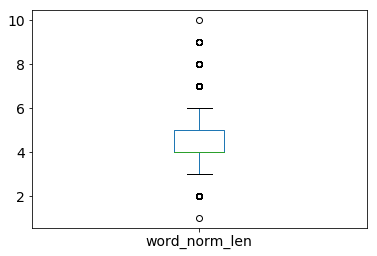

In [356]:
social_media_words_df_clean_2['word_norm_len'].plot.box()

In [357]:
(social_media_words_df_clean_2.word_norm.map(len)==1).sum()

1

In [358]:
social_media_words_df_clean_2[social_media_words_df_clean_2.word_norm.map(len)==1]

,word_norm,word,doc_freq,lang_label,conflation_count,word_norm_len
2546,و,و,6338,MSA,1,1


In [359]:
social_media_words_df_clean_3 = social_media_words_df_clean_2[social_media_words_df_clean_2.word_norm_len>1]
social_media_words_df_clean_2.shape,social_media_words_df_clean_3.shape

((2917, 6), (2916, 6))

In [360]:
social_media_words_df_clean_3.head()

,word_norm,word,doc_freq,lang_label,conflation_count,word_norm_len
0,اب,اب,23,MSA,1,2
1,ابداع,ابداع,9,MSA,1,5
2,ابن,ابن,28,MSA,1,3
3,ابوها,ابوها,6,MSA,1,5
4,اتصالات,اتصالات,7,MSA,1,7


In [362]:
social_media_words_df_clean_3.lang_label.value_counts()

MSA    2129
TN      787
Name: lang_label, dtype: int64

In [368]:
#?social_media_words_df_clean_3.to_csv

In [370]:
assert(social_media_words_df_clean_3.word_norm.nunique() == social_media_words_df_clean_3.shape[0])

In [369]:
filename = '../../generated_data/TUN_Social_Media_words.csv'
assert(social_media_words_df_clean_3.word_norm.nunique() == social_media_words_df_clean_3.shape[0])
social_media_words_df_clean_3[['word_norm','lang_label']].to_csv(filename, encoding='utf8', header=False, index=False)